## Average Duration of Treatments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# mind the typo
vaso_df = pd.read_csv('vassopressors_mv_cohort.csv', usecols=['starttime', 'endtime'])
ivfl_df = pd.read_csv('inputevents_mv_cohort.csv', usecols=['starttime', 'endtime'])

# Compute Vasopressor and IV treatment durations
vaso_duration = (pd.to_datetime(vaso_df.endtime) - pd.to_datetime(vaso_df.starttime)) / pd.Timedelta(hours=1)
ivfl_duration = (pd.to_datetime(ivfl_df.endtime) - pd.to_datetime(ivfl_df.starttime)) / pd.Timedelta(hours=1)

# Remove outliers
vaso_duration = vaso_duration[(vaso_duration >= 0) & (vaso_duration < np.quantile(vaso_duration, 0.99))]
ivfl_duration = ivfl_duration[(ivfl_duration >= 0) & (ivfl_duration < np.quantile(ivfl_duration, 0.99))]

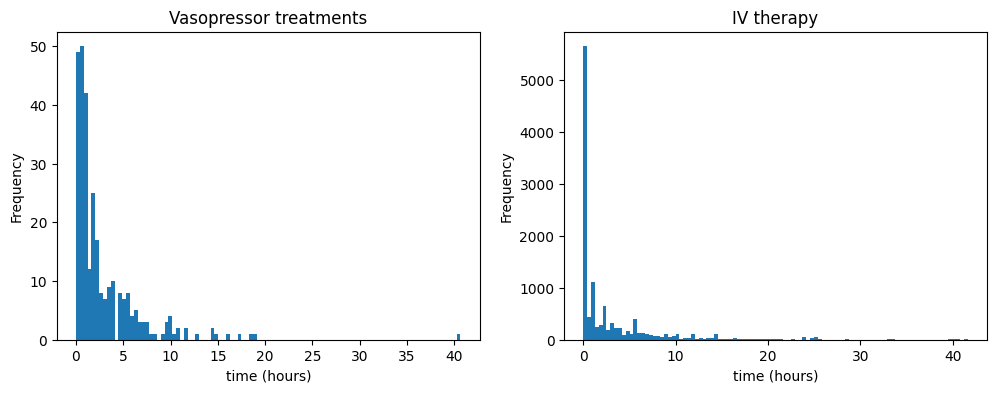

In [3]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(vaso_duration, bins=100)
plt.title('Vasopressor treatments')
plt.xlabel('time (hours)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(ivfl_duration, bins=100)
plt.title('IV therapy')
plt.xlabel('time (hours)')
plt.ylabel('Frequency');

In [5]:
print('Percentage beyond 4h:')
print('Vasopressors:', np.sum(vaso_duration >= 4) / len(vaso_duration))
print('IV fluids:   ', np.sum(ivfl_duration >= 4) / len(ivfl_duration))

Percentage beyond 4h:
Vasopressors: 0.22108843537414966
IV fluids:    0.2328675981370592


In [7]:
print('Percentage beyond 1h:')
print('Vasopressors:', np.sum(vaso_duration >= 1) / len(vaso_duration))
print('IV fluids:   ', np.sum(ivfl_duration >= 1) / len(ivfl_duration))

Percentage beyond 1h:
Vasopressors: 0.6156462585034014
IV fluids:    0.48186959414504327


In [19]:
print('Percentage beyond 1 min:')
print('Vasopressors:', np.sum(vaso_duration >= 1/60 + 1e-11) / len(vaso_duration))
print('IV fluids:   ', np.sum(ivfl_duration >= 1/60 + 1e-11) / len(ivfl_duration))

Percentage beyond 1 min:
Vasopressors: 0.9897959183673469
IV fluids:    0.5666167664670658


## Why so many low-duration IV therapies?

In [8]:
ivfl_df = pd.read_csv('inputevents_mv_cohort.csv', usecols=['starttime', 'endtime', 'amount', 'ordercategoryname'])

ivfl_df['duration'] = (pd.to_datetime(ivfl_df.endtime) - pd.to_datetime(ivfl_df.starttime)) / pd.Timedelta(hours=1)

ivfl_df.sample(frac=1).head()

,starttime,endtime,amount,ordercategoryname,duration
2925,2145-07-08 22:45:00,2145-07-08 22:46:00,40.000000,14-Oral/Gastric Intake,0.016667
11268,2123-11-30 01:42:00,2123-12-01 19:19:00,249.700000,01-Drips,41.616667
5072,2199-02-06 05:30:00,2199-02-06 06:30:00,49.999999,02-Fluids (Crystalloids),1.000000
10965,2123-12-21 08:02:00,2123-12-21 11:19:00,99.831097,01-Drips,3.283333
8609,2186-02-11 22:59:00,2186-02-12 04:19:00,21.348924,01-Drips,5.333333


In [12]:
print('Avg. duration of input event categories (in hours):')
ivfl_df.groupby('ordercategoryname').duration.mean()

Avg. duration of input event categories (in hours):


ordercategoryname
01-Drips                     5.403664
02-Fluids (Crystalloids)     6.765159
03-IV Fluid Bolus            0.014925
04-Fluids (Colloids)         0.515323
05-Med Bolus                 0.016606
06-Insulin (Non IV)          0.016667
07-Blood Products            2.869383
08-Antibiotics (IV)          0.016625
09-Antibiotics (Non IV)      0.016667
10-Prophylaxis (IV)          0.016667
11-Prophylaxis (Non IV)      0.016667
12-Parenteral Nutrition     23.502778
13-Enteral Nutrition         7.499590
14-Oral/Gastric Intake       0.016667
16-Pre Admission             0.016667
Name: duration, dtype: float64

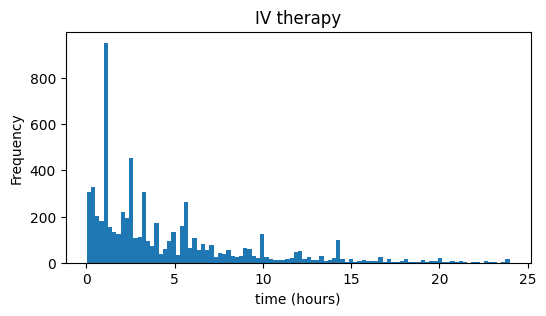

In [13]:
ivfl_df2 = ivfl_df[ivfl_df.duration > 0.0167]

ivfl_duration2 = ivfl_df2.duration[(ivfl_df2.duration >= 0) & (ivfl_df2.duration < np.quantile(ivfl_df2.duration, 0.95))]

plt.figure(figsize=(6, 3))
plt.hist(ivfl_duration2, bins=100)
plt.title('IV therapy')
plt.xlabel('time (hours)')
plt.ylabel('Frequency');

In [22]:
print('Percentage beyond 1h (of those beyond 1 min):')
print('IV fluids:   ', np.sum(ivfl_duration2 >= 1) / len(ivfl_duration2))

Percentage beyond 1h (of those beyond 1 min):
IV fluids:    0.8453483077857035
